In [1]:
import numpy as np
import pandas as pd

In [3]:
data_A= pd.read_csv('sepsis_cleaned_data_train_A.csv')
data_B= pd.read_csv('sepsis_cleaned_data_train_B.csv')

In [5]:
data_A

,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,patient_id,Unit1_encoded,Unit2_encoded,Unit_Unknown
0,80.0,100.0,36.50,121.00,58.0,13.50,77.27,1,-69.14,3,0,p014977,0,1,0
1,76.0,100.0,36.25,113.25,61.0,12.00,77.27,1,-69.14,4,0,p014977,0,1,0
2,80.0,100.0,36.25,132.75,71.5,12.00,77.27,1,-69.14,5,0,p014977,0,1,0
3,78.0,100.0,36.10,103.50,58.0,12.00,77.27,1,-69.14,6,0,p014977,0,1,0
4,74.0,100.0,36.00,128.75,69.5,12.50,77.27,1,-69.14,7,0,p014977,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238003,80.0,100.0,36.78,102.00,65.5,10.25,66.47,1,-12.88,6,0,p005863,0,1,0
238004,80.0,100.0,37.33,103.00,73.0,10.00,66.47,1,-12.88,8,0,p005863,0,1,0
238005,80.0,99.5,36.11,114.50,78.5,17.00,66.47,1,-12.88,11,0,p005863,0,1,0
238006,81.0,99.0,35.78,109.00,75.0,18.00,66.47,1,-12.88,12,0,p005863,0,1,0


In [7]:
data_B

,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,patient_id,Unit1_encoded,Unit2_encoded,Unit_Unknown
0,101.0,100.0,36.6,120.0,85.0,20.0,59,1,-6.01,7,0,p116812,1,0,0
1,87.0,100.0,36.0,115.0,83.0,20.0,59,1,-6.01,11,0,p116812,1,0,0
2,81.0,100.0,36.0,101.0,71.0,20.0,59,1,-6.01,15,0,p116812,1,0,0
3,87.0,100.0,36.7,112.0,86.0,20.0,59,1,-6.01,19,0,p116812,1,0,0
4,93.0,98.0,36.2,108.0,80.0,18.0,59,1,-6.01,23,0,p116812,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227307,62.0,96.5,35.9,154.0,100.0,22.0,67,0,-11.93,2,0,p118826,0,0,1
227308,72.0,97.0,36.5,193.0,126.0,26.0,67,0,-11.93,6,0,p118826,0,0,1
227309,78.0,95.0,37.3,151.0,95.0,16.0,67,0,-11.93,10,0,p118826,0,0,1
227310,81.0,94.0,37.2,133.5,94.0,23.0,67,0,-11.93,15,0,p118826,0,0,1


In [9]:
# Convert to sets
ids_a = set(data_A['patient_id'].unique())
ids_b = set(data_B['patient_id'].unique())

# Find common patient IDs
common_ids = ids_a.intersection(ids_b)

print(f"Number of common patient IDs: {len(common_ids)}")

Number of common patient IDs: 0


In [11]:
#Combine both the dfs

# Concatenate the two datasets
df_combined = pd.concat([data_A, data_B], ignore_index=True)


In [13]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465320 entries, 0 to 465319
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   HR             465320 non-null  float64
 1   O2Sat          465320 non-null  float64
 2   Temp           465320 non-null  float64
 3   SBP            465320 non-null  float64
 4   MAP            465320 non-null  float64
 5   Resp           465320 non-null  float64
 6   Age            465320 non-null  float64
 7   Gender         465320 non-null  int64  
 8   HospAdmTime    465320 non-null  float64
 9   ICULOS         465320 non-null  int64  
 10  SepsisLabel    465320 non-null  int64  
 11  patient_id     465320 non-null  object 
 12  Unit1_encoded  465320 non-null  int64  
 13  Unit2_encoded  465320 non-null  int64  
 14  Unit_Unknown   465320 non-null  int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 53.3+ MB


/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_33399/2015872932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='SepsisLabel', y='ICULOS', palette='Set2')


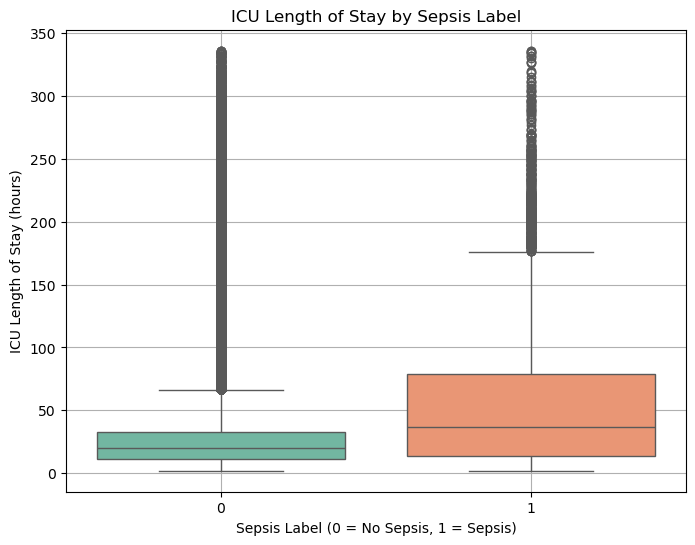

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_combined, x='SepsisLabel', y='ICULOS', palette='Set2')
plt.title('ICU Length of Stay by Sepsis Label')
plt.xlabel('Sepsis Label (0 = No Sepsis, 1 = Sepsis)')
plt.ylabel('ICU Length of Stay (hours)')
plt.grid(True)
plt.show()

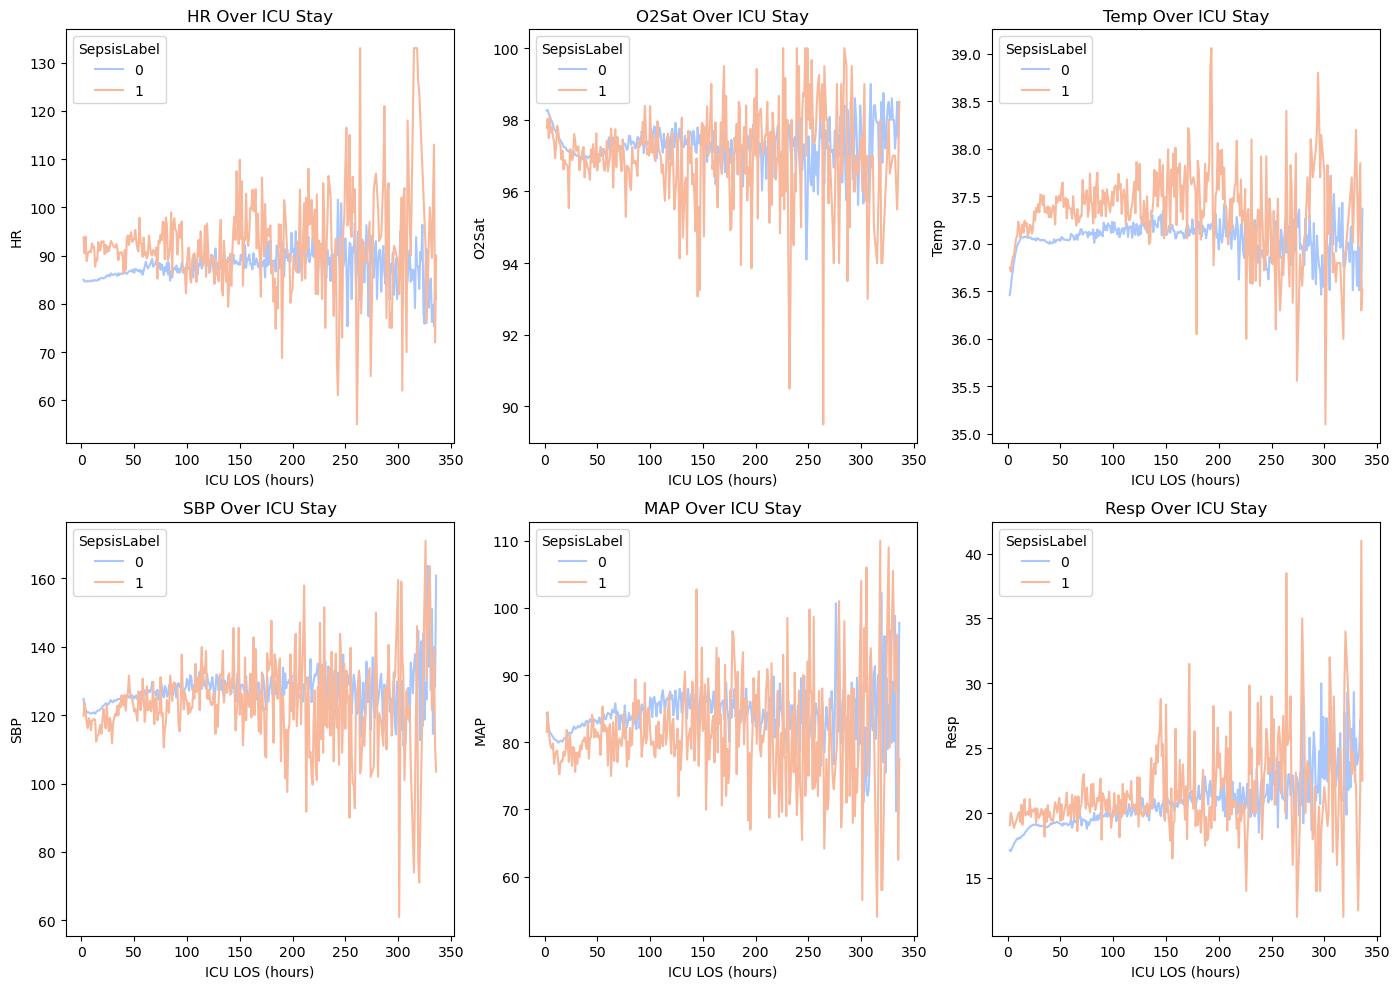

In [21]:
# Group by ICULOS and SepsisLabel, compute mean for selected vital signs
avg_vitals = df_combined.groupby(['ICULOS', 'SepsisLabel'])[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp']].mean().reset_index()

plt.figure(figsize=(14, 10))
vital_signs = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp']

for i, col in enumerate(vital_signs):
    plt.subplot(2, 3, i+1)
    sns.lineplot(data=avg_vitals, x='ICULOS', y=col, hue='SepsisLabel', palette='coolwarm')
    plt.title(f'{col} Over ICU Stay')
    plt.xlabel('ICU LOS (hours)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_33399/61682134.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unit_sepsis_rate, x='Unit', y='SepsisLabel', palette='viridis')


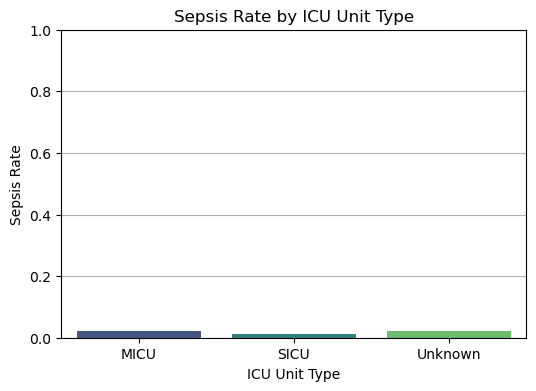

In [23]:
# Create a combined unit column for better interpretation
df_combined['Unit'] = df_combined[['Unit1_encoded', 'Unit2_encoded', 'Unit_Unknown']].idxmax(axis=1)
unit_mapping = {'Unit1_encoded': 'MICU', 'Unit2_encoded': 'SICU', 'Unit_Unknown': 'Unknown'}
df_combined['Unit'] = df_combined['Unit'].map(unit_mapping)

# Compute sepsis rate per unit
unit_sepsis_rate = df_combined.groupby('Unit')['SepsisLabel'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=unit_sepsis_rate, x='Unit', y='SepsisLabel', palette='viridis')
plt.title('Sepsis Rate by ICU Unit Type')
plt.ylabel('Sepsis Rate')
plt.xlabel('ICU Unit Type')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_33399/3993266287.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sepsis = df_combined.groupby('AgeGroup')['SepsisLabel'].mean().reset_index()
/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_33399/3993266287.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_sepsis, x='AgeGroup', y='SepsisLabel', palette='magma')


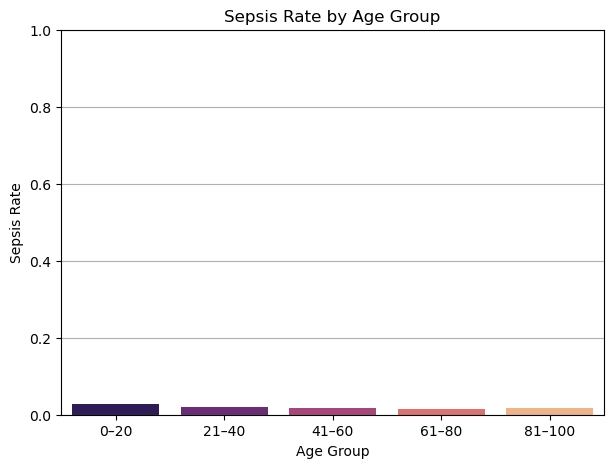

In [25]:
# Create age bins
df_combined['AgeGroup'] = pd.cut(df_combined['Age'], bins=[0, 20, 40, 60, 80, 100], 
                                 labels=['0–20', '21–40', '41–60', '61–80', '81–100'])

# Calculate sepsis rate by age group
age_sepsis = df_combined.groupby('AgeGroup')['SepsisLabel'].mean().reset_index()

plt.figure(figsize=(7, 5))
sns.barplot(data=age_sepsis, x='AgeGroup', y='SepsisLabel', palette='magma')
plt.title('Sepsis Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sepsis Rate')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()

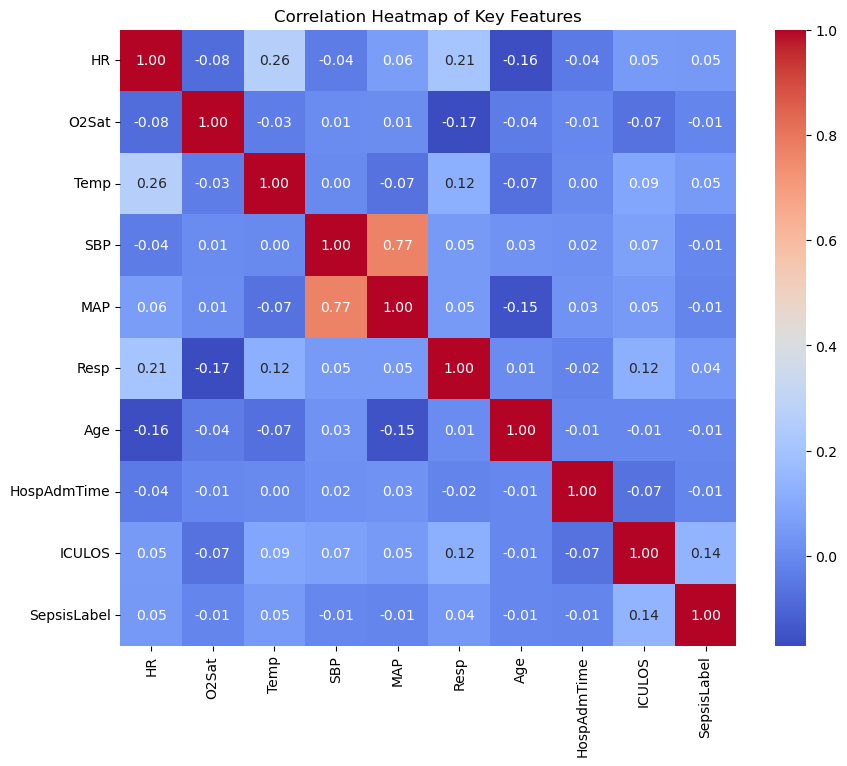

In [27]:
# Select numerical columns only
numerical_cols = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'Age', 'HospAdmTime', 'ICULOS', 'SepsisLabel']
corr = df_combined[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Key Features')
plt.show()

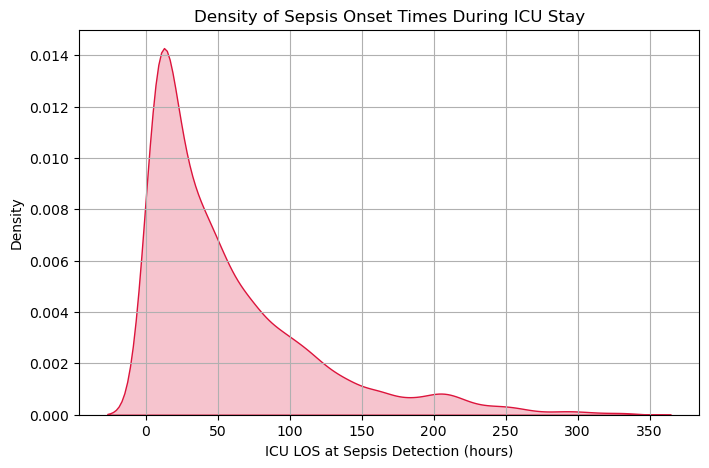

In [29]:
# Filter only septic events
sepsis_onset_times = df_combined[df_combined['SepsisLabel'] == 1]['ICULOS']

plt.figure(figsize=(8, 5))
sns.kdeplot(sepsis_onset_times, fill=True, color='crimson')
plt.title('Density of Sepsis Onset Times During ICU Stay')
plt.xlabel('ICU LOS at Sepsis Detection (hours)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_33399/103240053.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Gender', y='ICULOS', palette='Set3', ax=axes[0])
/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_33399/103240053.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_sepsis, x='Gender', y='SepsisLabel', palette='Set2', ax=axes[1])


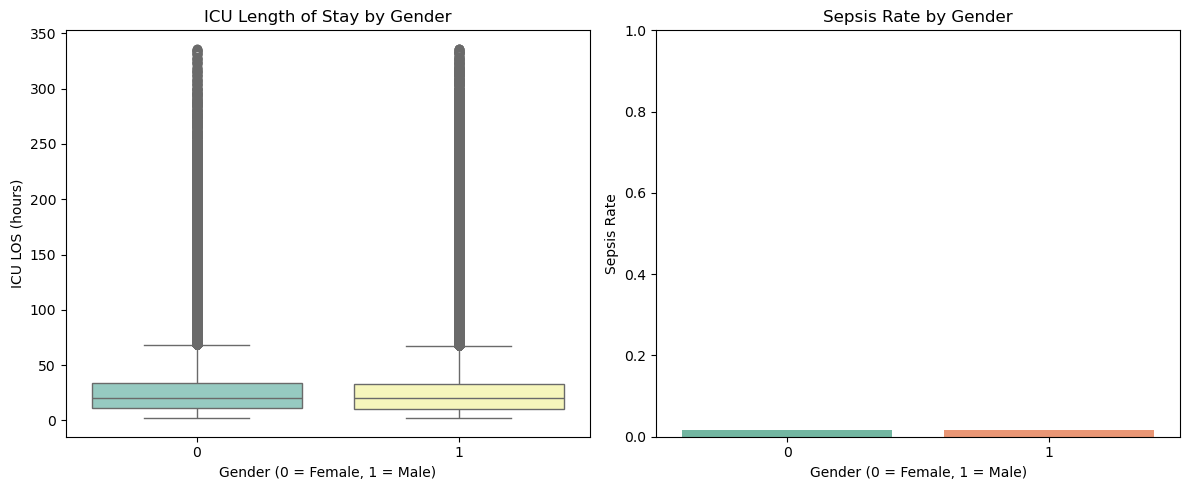

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ICU Length of Stay by Gender
sns.boxplot(data=df_combined, x='Gender', y='ICULOS', palette='Set3', ax=axes[0])
axes[0].set_title('ICU Length of Stay by Gender')
axes[0].set_xlabel('Gender (0 = Female, 1 = Male)')
axes[0].set_ylabel('ICU LOS (hours)')

# Sepsis Rate by Gender
gender_sepsis = df_combined.groupby('Gender')['SepsisLabel'].mean().reset_index()
sns.barplot(data=gender_sepsis, x='Gender', y='SepsisLabel', palette='Set2', ax=axes[1])
axes[1].set_title('Sepsis Rate by Gender')
axes[1].set_xlabel('Gender (0 = Female, 1 = Male)')
axes[1].set_ylabel('Sepsis Rate')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

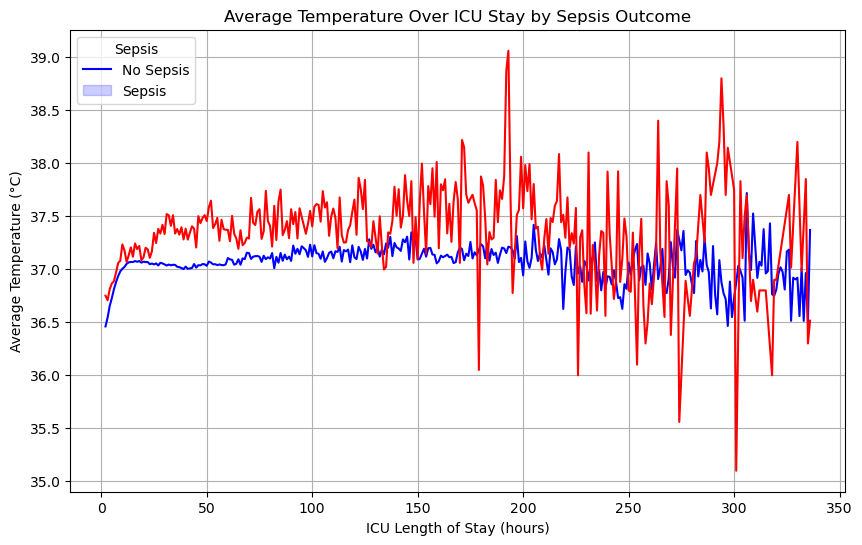

In [33]:
# Group by ICULOS and SepsisLabel, then average temperature
temp_trend = df_combined.groupby(['ICULOS', 'SepsisLabel'])['Temp'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=temp_trend, x='ICULOS', y='Temp', hue='SepsisLabel', palette=['blue', 'red'])
plt.title('Average Temperature Over ICU Stay by Sepsis Outcome')
plt.xlabel('ICU Length of Stay (hours)')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Sepsis', labels=['No Sepsis', 'Sepsis'])
plt.grid(True)
plt.show()

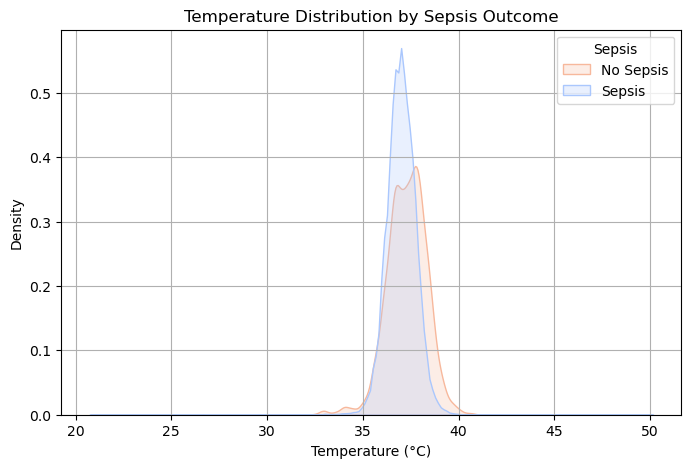

In [35]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_combined, x='Temp', hue='SepsisLabel', fill=True, common_norm=False, palette='coolwarm')
plt.title('Temperature Distribution by Sepsis Outcome')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend(title='Sepsis', labels=['No Sepsis', 'Sepsis'])
plt.grid(True)
plt.show()

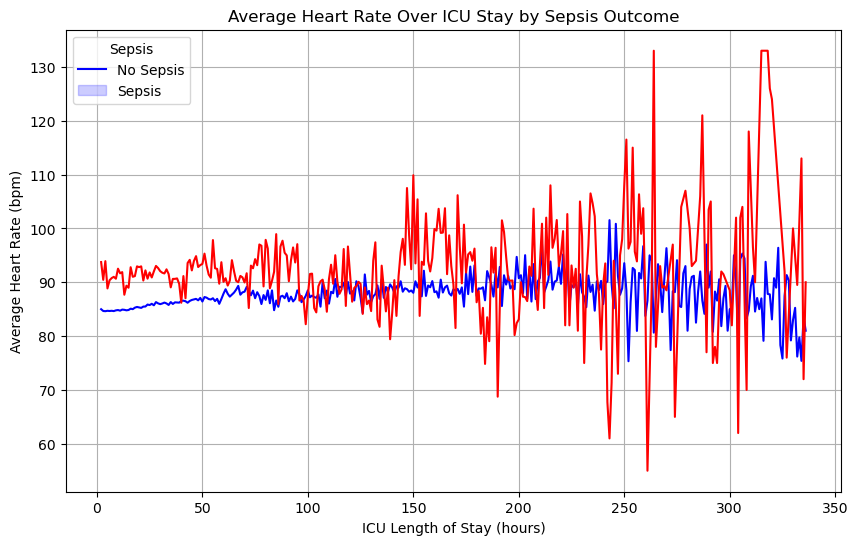

In [37]:
# Group by ICULOS and SepsisLabel to compute average HR
hr_trend = df_combined.groupby(['ICULOS', 'SepsisLabel'])['HR'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hr_trend, x='ICULOS', y='HR', hue='SepsisLabel', palette=['blue', 'red'])
plt.title('Average Heart Rate Over ICU Stay by Sepsis Outcome')
plt.xlabel('ICU Length of Stay (hours)')
plt.ylabel('Average Heart Rate (bpm)')
plt.legend(title='Sepsis', labels=['No Sepsis', 'Sepsis'])
plt.grid(True)
plt.show()

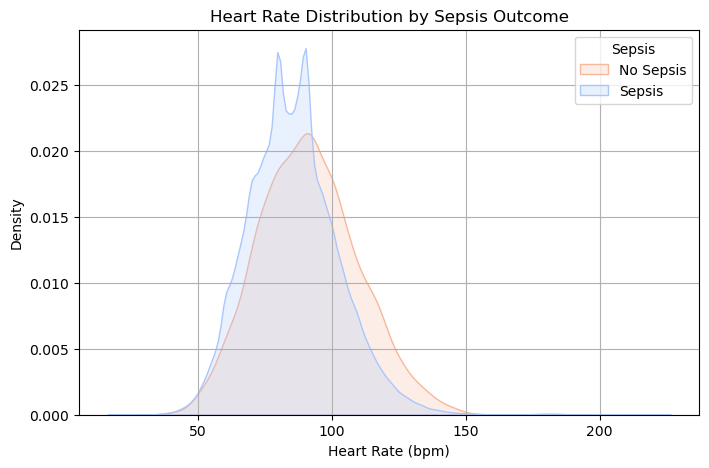

In [39]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_combined, x='HR', hue='SepsisLabel', fill=True, common_norm=False, palette='coolwarm')
plt.title('Heart Rate Distribution by Sepsis Outcome')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Density')
plt.legend(title='Sepsis', labels=['No Sepsis', 'Sepsis'])
plt.grid(True)
plt.show()

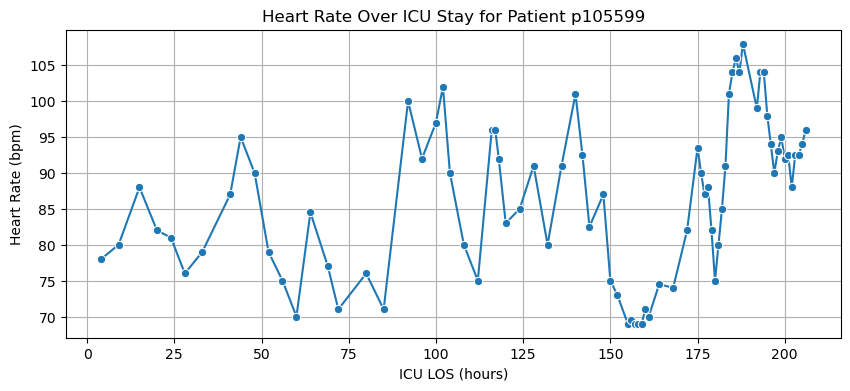

In [41]:
# Pick a septic patient with multiple data points
septic_patient = df_combined[df_combined['SepsisLabel'] == 1]['patient_id'].value_counts().idxmax()
patient_hr_data = df_combined[df_combined['patient_id'] == septic_patient]

plt.figure(figsize=(10, 4))
sns.lineplot(data=patient_hr_data, x='ICULOS', y='HR', marker='o')
plt.title(f'Heart Rate Over ICU Stay for Patient {septic_patient}')
plt.xlabel('ICU LOS (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.show()

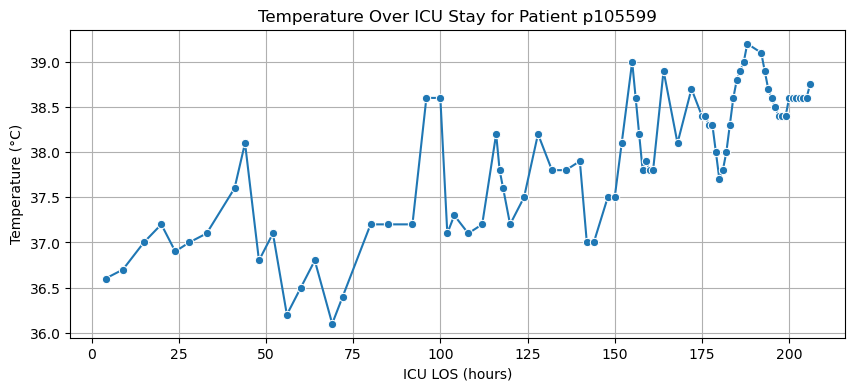

In [43]:
# Pick a patient with sepsis and enough data points
sample_patient = df_combined[df_combined['SepsisLabel'] == 1]['patient_id'].value_counts().idxmax()

# Filter for that patient
patient_data = df_combined[df_combined['patient_id'] == sample_patient]

plt.figure(figsize=(10, 4))
sns.lineplot(data=patient_data, x='ICULOS', y='Temp', marker='o')
plt.title(f'Temperature Over ICU Stay for Patient {sample_patient}')
plt.xlabel('ICU LOS (hours)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

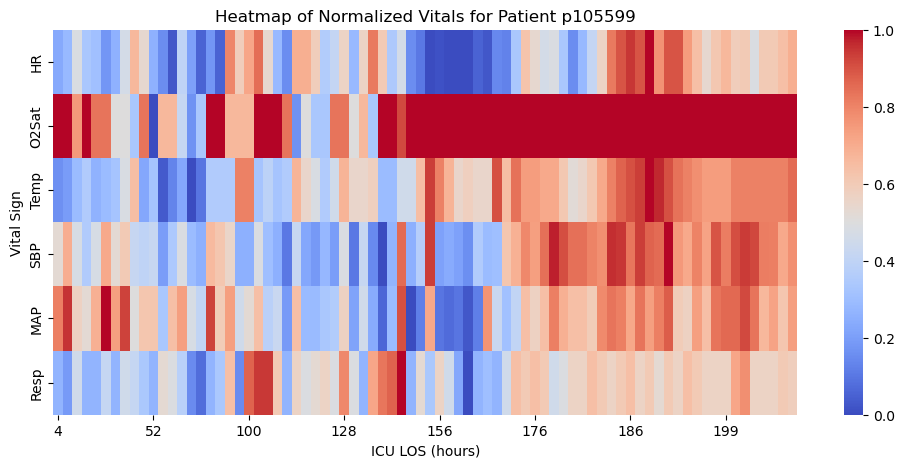

In [45]:
# Select a septic patient and pivot vital signs over time
vitals = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp']
septic_patient_id = df_combined[df_combined['SepsisLabel'] == 1]['patient_id'].value_counts().idxmax()
septic_patient_data = df_combined[df_combined['patient_id'] == septic_patient_id].sort_values('ICULOS')

# Normalize for heatmap clarity
vitals_df = septic_patient_data[['ICULOS'] + vitals].set_index('ICULOS')
vitals_df_norm = (vitals_df - vitals_df.min()) / (vitals_df.max() - vitals_df.min())

plt.figure(figsize=(12, 5))
sns.heatmap(vitals_df_norm.T, cmap='coolwarm', cbar=True, xticklabels=10)
plt.title(f'Heatmap of Normalized Vitals for Patient {septic_patient_id}')
plt.xlabel('ICU LOS (hours)')
plt.ylabel('Vital Sign')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Select and scale relevant features
features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'Age']
X = StandardScaler().fit_transform(df_combined[features])

# Apply t-SNE for 2D projection
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plot with color by SepsisLabel
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1],
                hue=df_combined['SepsisLabel'], alpha=0.5, palette=['green', 'red'])
plt.title('t-SNE Projection of Patient States (Vitals + Age)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Sepsis')
plt.grid(True)
plt.show()

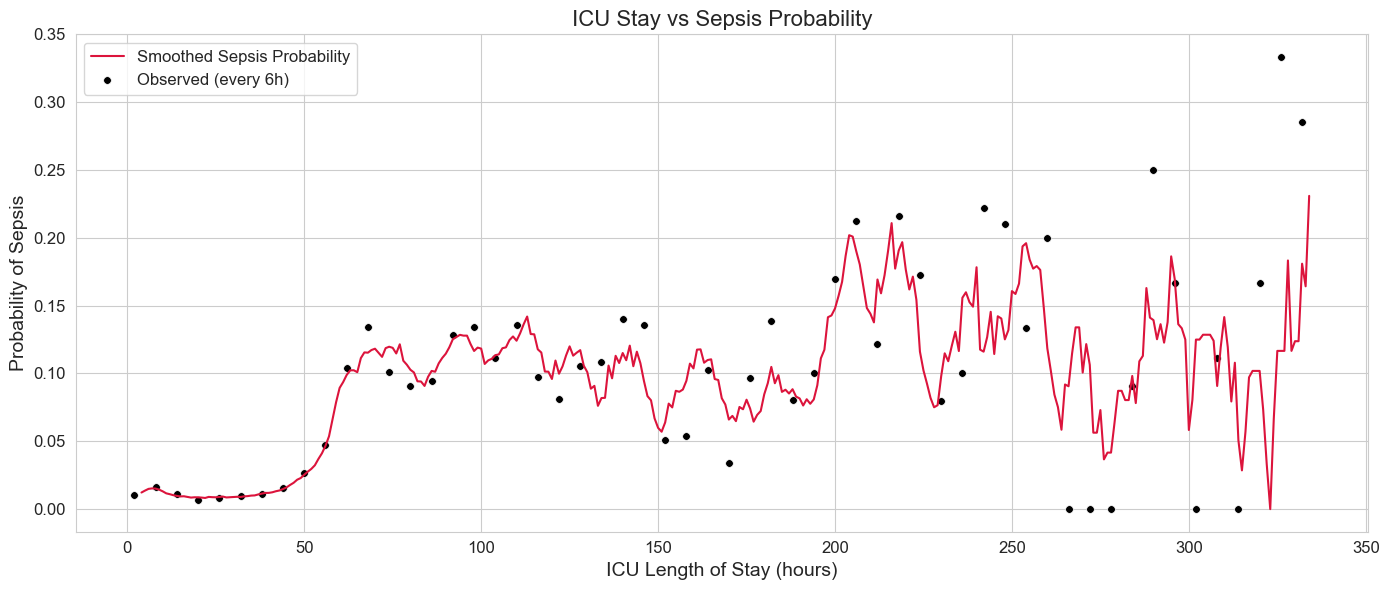

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and smooth
grouped = (
    df_combined.groupby('ICULOS')['SepsisLabel']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean': 'SepsisProbability', 'count': 'PatientHours'})
)
grouped['SepsisProb_Smooth'] = grouped['SepsisProbability'].rolling(window=5, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Plot smoothed probability line
sns.lineplot(data=grouped, x='ICULOS', y='SepsisProb_Smooth', label='Smoothed Sepsis Probability', color='crimson')

# Optional: add original points at regular intervals
sns.scatterplot(data=grouped[::6], x='ICULOS', y='SepsisProbability', color='black', s=30, label='Observed (every 6h)')

# Axis labels and title
plt.title('ICU Stay vs Sepsis Probability', fontsize=16)
plt.xlabel('ICU Length of Stay (hours)', fontsize=14)
plt.ylabel('Probability of Sepsis', fontsize=14)

# Ticks and legend
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [21]:
#save the combined data


# Save it to CSV
df_combined.to_csv('sepsis_data_cleaned.csv', index=False)